In [39]:
# Importing Libraries
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='nitscode020', api_key='AK71DXgjNNdZHkch4MtK')
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)
import squarify 
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [270]:
# Setting Work Directory
os.chdir('C:/Users/nitsc/Downloads/Spring 2018/Prog With DS/stock-time-series')

### Analyzing the Current Market

In [277]:
# Importing all Stocks Data 2017
all_stocks17=pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv')
all_stocks17.head()

,Date,Open,High,Low,Close,Volume,Name
0,2017-01-03,178.83,180.00,177.22,178.05,2510055,MMM
1,2017-01-04,178.03,178.90,177.61,178.32,1541985,MMM
2,2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM
3,2017-01-06,177.29,178.60,175.80,178.23,1625049,MMM
4,2017-01-09,178.37,178.38,177.20,177.27,1622625,MMM


### Treemap to Identify Big Players (Based on the Price and Trade Volume)

This treemap conveys two important characterstics of an stock, average closing price and tade volume. 
The color represents price. Darker the color higher is the price of stock.
The size of the box represents trade volume. The bigger the box the higher is volumes of stock traded in 2017.

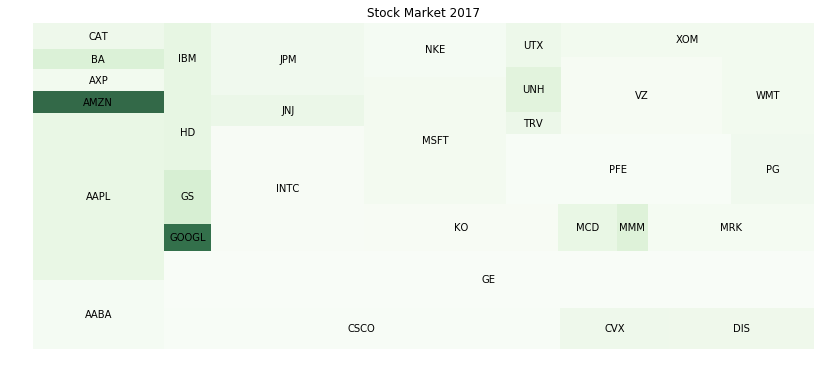

In [279]:
# Aggregation
d={'Close':'mean','Volume':'mean'}
x=all_stocks17.groupby('Name').agg(d)

# Assigning Colors
cmap = matplotlib.cm.Greens
mini=min(x['Close'])
maxi=max(x['Close'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in x['Close']]

# Plotting the market
squarify.plot(sizes=x['Volume'], label=x.index, alpha=.8,color=colors )
plt.axis('off')
plt.title('Stock Market 2017')
plt.show()

We can observe that Google(GOOGL) and Amazon(AMZN) has very high priced stocks whereas GE, Apple(AAPL), Microsoft and Cisco(CSCO) were traded in high volumes in 2017.

### Analyzing Apple's Stock

Let's anayze Apple's stock and see how Apple is performing in the market.

In [47]:
appl=pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')

In [48]:
appl.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [49]:
appl.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [50]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null object
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [282]:
appl['Date']=pd.to_datetime(appl['Date'])
appl.set_index('Date',inplace=True)

### Apple's Market Share

In [284]:
# Pie chart to show Apple's Market Share (Price * Volume)
mkt_share=all_stocks17.groupby('Name')['Close','Volume'].mean()
mkt_share['Market_share'] = mkt_share['Close'] * mkt_share['Volume']
colors = ['#FEBFB3','#D0F9B1']
trace = go.Pie(labels=['Apple','Rest of the Market'], values=[mkt_share[mkt_share.index=='AAPL']['Market_share'].sum(),
                                                              mkt_share[mkt_share.index!='AAPL']['Market_share'].sum()],
                                                              hoverinfo='label+percent', textinfo='value', 
                                                              textfont=dict(size=15),
                                                              marker=dict(colors=colors,
                                                              line=dict(color='#00000', width=2.5)))

layout = {'title': 'Apple\'s Market Share in 2017'}
fig = dict(data=[trace], layout=layout)
py.iplot(fig, filename='styled_pie_chart')

Above chart shows that Apple captures 14.4% of the stock market with a trade of more than $4 billion in 2017.

### Apple's Performance in Past Years

Let's plot a candle chart to see how Apple has been performing in past years and how price of its shares has changed since 2006.

In [286]:
# Candlestick chart
appl_stock = go.Candlestick(x=aapl.index,
                       open=aapl.Open,
                       high=aapl.High,
                       low=aapl.Low,
                       close=aapl.Close)
data = [appl_stock]
layout = {
    'title': 'Apple Stock Prices 2006 - 2017',
    'yaxis': {'title': 'AAPL Stock'}}
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='simple_candlestick')

The above candlestick chart shows the trend of Apple's share since. 2006. The stock has shown a significant growth since 2009 and has shown a increase in growth rate since June 2016.

### Apple's Trade Volume Trend

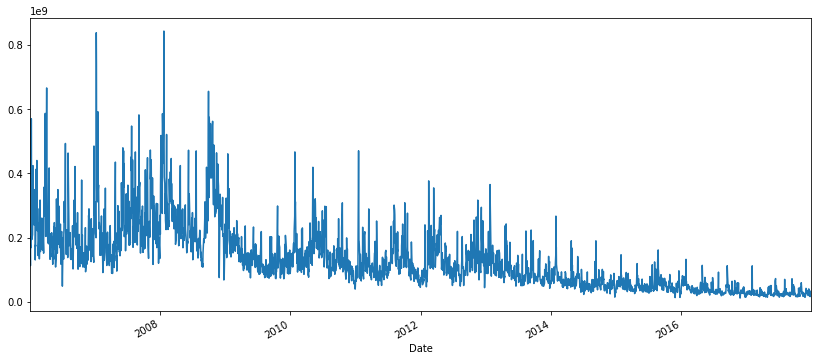

In [288]:
appl['Volume'].plot()

The stock has shown a constant decline in trade volume since 2006. Let's analyze, why?

### Apple's Average Closing Price Across Years

To understand the reason for constant decline in volume let's see how has the price changed in past years.

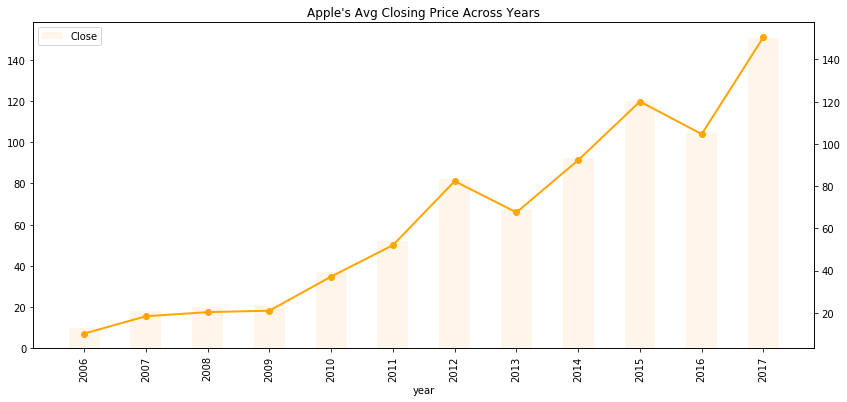

In [290]:
# Avg closing Price vs years
appl['year']=appl.index.year
appl_yrs=appl.groupby(['year'])['Close'].mean().to_frame()
fig = plt.figure()
ax1=appl_yrs.plot(kind='bar',colormap='Oranges')
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(),appl_yrs['Close'],linestyle='-', marker='o',color='orange', linewidth=2.0)
title('Apple\'s Avg Closing Price Across Years')

The above chart shows that price of the share has been rising continously since 2006. The greater the increase in price the lower is the trade volume.

### Apple's Growth Rate

Let's see how much percentage growth the stock has shown in past years.

In [293]:
# Apple's annual growth
appl_yrs['Close_lag_yr']=appl_yrs['Close'].shift(-1)
appl_yrs['Annual_growth'] = ((appl_yrs['Close_lag_yr']-appl_yrs['Close'])/appl_yrs['Close'])*100
trace = go.Scatter(x = appl_yrs.index, y = appl_yrs['Annual_growth'],name='Annual Growth Rate')
layout = go.Layout(title='Apple\'s Annual Growth Rate',
                   plot_bgcolor='rgb(210, 230,210)', 
                   showlegend=True)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

The stock has shown highest growth in 2009, around 77% and then in 2016 i.e. 43%.

### Comparison With Other Market Giants

Let's see how Apple has been performing as compared to other market giants like Amazon, Google and Microsoft.

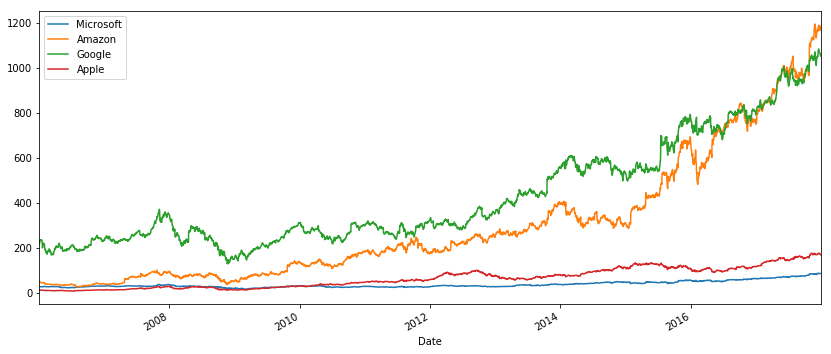

In [413]:
# Comparison
msft=pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv')
amzn=pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
googl=pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
for i in [msft,amzn,googl]:    
    i['Date']=pd.to_datetime(i['Date'])
    i.set_index('Date',inplace=True)
appl_comp=pd.concat([msft['Close'].rename('Microsoft'),amzn['Close'].rename('Amazon'),googl['Close'].rename('Google'),appl['Close'].rename('Apple')],axis=1,names=['a','b','c','d'])
appl_comp.plot()

As per the above chart Apple is performing better than Microsoft in terms of growth but Google and Amazon still dominate the market.

### Log Comparison

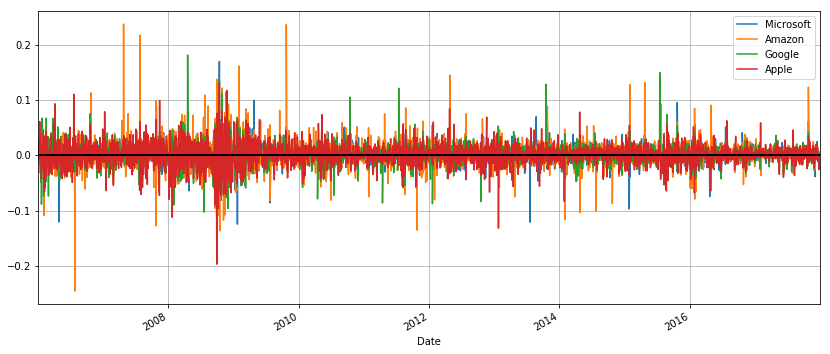

In [412]:
# Log Comparison/ Percentage Comparison
appl_comp = appl_comp.apply(lambda x: np.log(x) - np.log(x.shift(1)))
appl_comp.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

### Apple' stock, Time Series and Correlation

Lets' look at the moving averages and serial correlation trends. Then use it to predict future price of Apple's share.

### Moving Averages

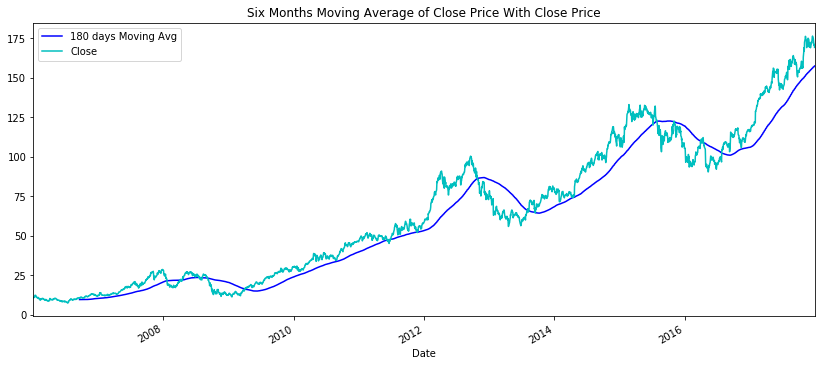

In [297]:
appl['180 days Moving Avg']=np.round(appl["Close"].rolling(window = 180, center = False).mean(), 2)
appl['180 days Moving Avg'].plot(style='b',title='Six Months Moving Average of Close Price With Close Price',legend=True)
appl['Close'].plot(style='c',legend=True)

### Serial Corrleation

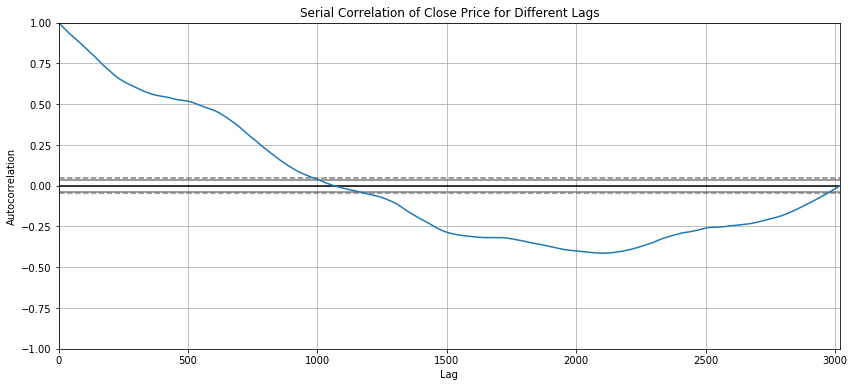

In [415]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(appl['Close'])
title('Serial Correlation of Close Price for Different Lags')

Above figure shows serial correlation for different lags.